This notebook fits the bias model.

Note the parameters from this notebook are used in `src/lbg_survey_metrics/cmb_xcorr.py`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from lbg_survey_metrics.constants import single_col

In [2]:
# https://arxiv.org/abs/1407.7316 (HST)
z1 = [3.8, 4.9, 5.9, 7.2]
b1 = [4.0, 3.8, 6.2, 9.7]
e1 = [0.3, 0.75, 1.35, 2.25]

# https://arxiv.org/abs/0903.3951 (CARS)
z2 = [3.28, 3.87, 4.74]
b2 = [2.41, 3.49, 3.90]
e2 = [0.08, 0.17, 0.19]

# https://arxiv.org/abs/2404.03569v2 (DESI)
z3 = [2.9, 2.9]
b3 = [3.06, 3.39]
e3 = [0.25, 0.27]

# Fit all the biases
# error floor of 0.25 because we're not sure if any of 
# these samples will map onto our sample
zf = np.array(z1 + z2 + z3)
bf = np.array(b1 + b2 + b3)
ef = np.clip(np.array(e1 + e2 + e3), 0.25, None)

# Perform weighted least squares
def fb(p):
    resid = p * (1 + zf)**1.6 - bf
    return np.sum(np.square(resid / ef))

minimize(fb, 0.3)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 33.693338456988826
        x: [ 2.791e-01]
      nit: 1
      jac: [ 2.050e-05]
 hess_inv: [[ 3.716e-05]]
     nfev: 68
     njev: 28

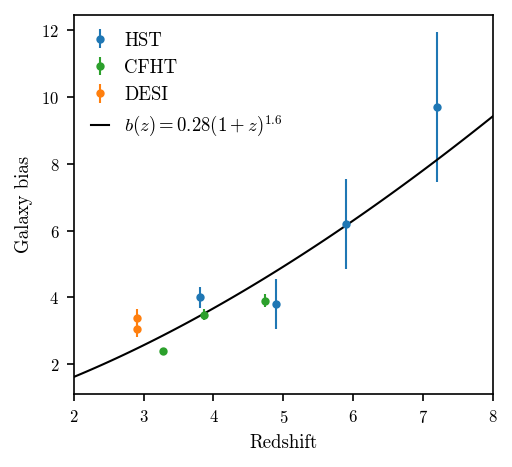

In [3]:
fig, ax = plt.subplots(figsize=single_col, constrained_layout=True, dpi=150)

# Plot data
ax.errorbar(z3, b3, e3, ls="", marker=".", lw=1, c="C1", label="DESI")
ax.errorbar(z2, b2, e2, ls="", marker=".", lw=1, c="C2", label="CFHT")
ax.errorbar(z1, b1, e1, ls="", marker=".", lw=1, c="C0",label="HST")

# Plot fit
z = np.linspace(2, 8, 100)
b = 0.28 * (1 + z) ** 1.6
ax.plot(z, b, c="k", lw=1, label="$b(z) = 0.28 (1 + z)^{1.6}$")

# Create legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, handlelength=1, frameon=False)

ax.set(
    xlim=(2, 8),
    xlabel="Redshift",
    ylabel="Galaxy bias",
)

fig.savefig("figures/galaxy_bias.pdf")